## Discrete-time linear systems

Following the same steps performed in the continuous-time case. The Lyapunov theory will be employed to check the stability of the discrete-time linear system, considering a quadratic Lyapunov function $V(x_k)=x_{k}^TPx_k$. The Lyapunov function must be positive along the trajectories of the system, i.e., $V(x_k)>0$, and the rate of variation of the Lyapunov function must be negative $V(x_{k+1})-V(x_k)<0$.

Consider the following autonomous discrete-time system
$$
x_{k+1}=Ax_k.
$$
To provide a stability certificate for this system, the Lyapunov theory will be employed. One must have:

* $V(x_k)>0 \rightarrow x_{k}^TPx_k>0$, or simply $P>0$.
* $V(x_{k+1})-V(x_k)<0$,
or

$$
{x}_{k+1}^TPx_{k+1}- x_{k}^TPx_k <0, \\
x_{k}^TA^TPAx_k-x_k^TPx_k<0, $$
that can be checked by the LMI $A^TPA-P<0.$


As in the continuous-time case, we have a set with two LMIs, which must be solved to give an answer about the stability of the system. For precisely known systems, the conditions
$$
P>0, \quad A^TPA-P<0,
$$
are necessary and sufficient to certify the stability of the system $x_{k+1}=Ax_k$.


The following example will be employed to show how cvxpy can be used to solve such a problem. Cvxpy only considers non-strict inequalities. To be sure that the solution is positive or negative definite, we must impose the following constraints:
$$
P>\varepsilon I, \quad A^TPA-P<-\varepsilon I.
$$
with a small value of $\varepsilon>0$.


Consider the following discrete-time autonomous system.

$$
x_{k+1}=\begin{bmatrix}-0.8 & 0.2 \\ 0.4 & 0.9 \end{bmatrix}x_k
$$

In [1]:
#Stability of linear discrete-time systems

import cvxpy as cp
import numpy as np

#Define the system matrix
A = np.array([[-0.8, 0.2],[0.4, 0.9]])
eps=1e-3
#Find the number of states
nx=A.shape[0]
#Create the decision variable
P = cp.Variable((nx,nx), PSD=True)
#Add the constraints
constraints = [P >> eps*np.eye(nx), A.T@P@A - P << -eps*np.eye(nx)]
#Create the objective function
objective = cp.Minimize(0)
#Define the problem to be solved
problem = cp.Problem(objective,constraints)
#Solve the problem
result = problem.solve()

#Print status and solution
if problem.status in ["optimal"]:
    P = P.value
    print(f"status: {problem.status}")
    print(f"The Lyapunov matrix is:\n{P}")

    # Check if P is positive definite
    eigenvalues = np.linalg.eigvals(P)
    print(f"The eigenvalues of the Lyapunov matrix are: {eigenvalues}")

    # Check positive definiteness by verifying that all eigenvalues are positive
    if np.all(eigenvalues > 0):
        print("P is positive definite.")
    else:
        print("P is not positive definite.")
else:
    print(f"Problem status: {problem.status}. No valid solution found.")

#Check the eigenvalues of A
eigenvaluesA = np.linalg.eigvals(A)

abs_eigenvaluesA = np.abs(eigenvaluesA)

print(f"The eigenvalues of the matrix A are: {eigenvaluesA}")
print("The absolute values of the eigenvalues are:", abs_eigenvaluesA)


status: optimal
The Lyapunov matrix is:
[[0.72345517 0.16543243]
 [0.16543243 1.09885037]]
The eigenvalues of the Lyapunov matrix are: [0.66095629 1.16134925]
P is positive definite.
The eigenvalues of the matrix A are: [-0.84582364  0.94582364]
The absolute values of the eigenvalues are: [0.84582364 0.94582364]


Note that the status of the solution is optimal, indicating that the problem was solved and a solution was found.

In the sequel we show how to compute the time-response for the system ${x}_{k+1}=Ax_k$, we also use the states value to plot the trajectories of the Lyapunov function $V(x_k)=x_k^TPx_k$.


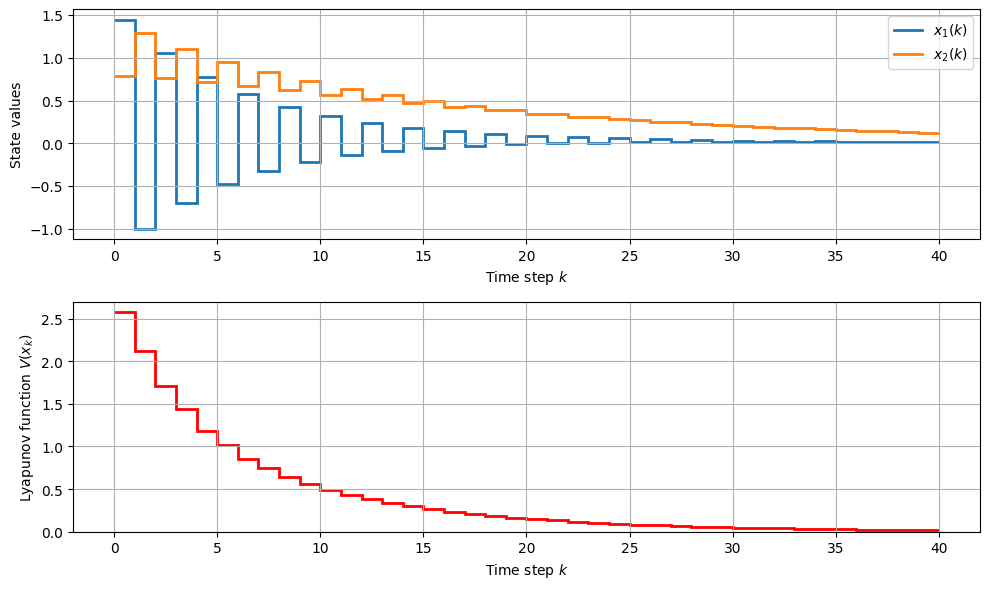

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define system matrix A and positive definite matrix P for the Lyapunov function
A = np.array([[-0.8, 0.2],
            [0.4, 0.9]])

# Initial condition
x0 = np.random.randn(2)

# Number of time steps
N = 40

# Initialize arrays to store values of x and V(x)
x_values = []
V_values = []

# Set initial condition
x_k = x0

# Simulate the system and compute the Lyapunov function
for k in range(N):
    x_values.append(x_k)  # Store the state
    V_k = x_k.T @ P @ x_k  # Compute the Lyapunov function V(x_k)
    V_values.append(V_k)

    # Update the state using x_{k+1} = A * x_k
    x_k = A @ x_k

x_values = np.array(x_values)
V_values = np.array(V_values)

# Plot the state trajectories
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.stairs(x_values[:, 0], label='$x_1(k)$', linewidth=2, baseline=None)
plt.stairs(x_values[:, 1], label='$x_2(k)$', linewidth=2, baseline=None)
plt.xlabel('Time step $k$')
plt.ylabel('State values')
plt.grid(True)
plt.legend()

# Plot the Lyapunov function V(x_k) using stairs
plt.subplot(2, 1, 2)
plt.stairs(V_values, label='$V(x_k) = x_k^T P x_k$', color='r', linewidth=2, baseline=None)
plt.xlabel('Time step $k$')
plt.ylabel('Lyapunov function $V(x_k)$')
plt.grid(True)

plt.tight_layout()
plt.show()
